In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, \
                                        cross_val_predict, cross_val_score

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import utils

import warnings
warnings.filterwarnings('ignore')

## Load data

### Iris

In [164]:
ds_name = 'Iris'
out_path = '../out_rf/out_iris/'
iris = pd.read_csv("../data/iris.data", sep=",")
iris_X = iris.drop(columns=['Class']).to_numpy()
iris_y = iris['Class'].to_numpy()
#utils.plot_dataset(iris, 'Class')

#print("=== Before pre-process ===")
#utils.describe(ireis_X)

data_X = utils.normalize(iris_X)
#data_X = iris_X
data_y = iris_y

#print("\n=== After pre-process ===")
#utils.describe(data_X)

### Glass

In [52]:
ds_name = 'Glass'
out_path = '../out_rf/out_glass/'
glass = pd.read_csv("../data/glass.data", sep=",").drop(columns=['Id'])
glass_X = glass.drop(columns=['Class']).to_numpy()
glass_y = glass['Class'].to_numpy()
#plot_dataset(glass, attr='Class')

#print("=== Before pre-process ===")
#utils.describe(glass_X)

data_X = utils.normalize(glass_X)
#data_X = glass_X
data_y = glass_y

#print("\n=== After pre-process ===")
#utils.describe(data_X)

### Wine

In [68]:
ds_name = 'Wine'
out_path = '../out_rf/out_wine/'
wine = pd.read_csv("../data/wine.data", sep=",")
wine_X = wine.drop(columns=['Class']).to_numpy()
wine_y = wine['Class'].to_numpy()
#utils.plot_dataset(wine, attr='Class')

#print("=== Before pre-process ===")
#utils.describe(wine_X)

data_X = utils.normalize(wine_X)
#data_X = wine_X
data_y = wine_y

#print("\n=== After pre-process ===")
#utils.describe(data_X)

### Seeds

In [77]:
ds_name = 'Seeds'
out_path = '../out_rf/out_seeds/'
seeds = pd.read_csv("../data/seeds_dataset.txt", sep="\t")
seeds_X = seeds.drop(columns=['Class']).to_numpy()
seeds_y = seeds['Class'].to_numpy()
#utils.plot_dataset(seeds, attr='Class')

#print("=== Before pre-process ===")
#utils.describe(seeds_X)

data_X = utils.normalize(seeds_X)
#data_X = seeds_X
data_y = seeds_y

#print("\n=== After pre-process ===")
#utils.describe(data_X)

## Random forest

In [78]:
def rf_for_estimators_nb(X, y, folds, est_list):
    y_preds = {}
    for estimators in est_list:
        classifier = RandomForestClassifier(n_estimators=estimators)
        y_pred = cross_val_predict(classifier, X, y, cv=folds)
        y_preds[estimators] = y_pred
    return y_preds

In [79]:
def rf_for_params(X, y, classifier, folds):
    y_pred = cross_val_predict(classifier, X, y, cv=folds)
    return y_pred

## Experiments

### FSC for different number of estimators

In [80]:
fold_nums = [2, 5, 10]
est_list = [1, 5, 9, 25, 49, 75, 99]
show_plots = False
tex = True # if False - readable info

=== K-Fold ===
K = 2
   1 & 0.229 & 0.059 & 0.107 & 0.076 \\
   5 & 0.224 & 0.058 & 0.105 & 0.074 \\
   9 & 0.22 & 0.055 & 0.103 & 0.072 \\
   25 & 0.206 & 0.054 & 0.096 & 0.069 \\
   49 & 0.229 & 0.057 & 0.107 & 0.075 \\
   75 & 0.196 & 0.053 & 0.092 & 0.067 \\
   99 & 0.229 & 0.058 & 0.107 & 0.076 \\
K = 5
   1 & 0.252 & 0.142 & 0.206 & 0.155 \\
   5 & 0.294 & 0.144 & 0.163 & 0.148 \\
   9 & 0.29 & 0.136 & 0.171 & 0.147 \\
   25 & 0.29 & 0.138 & 0.192 & 0.152 \\
   49 & 0.304 & 0.144 & 0.178 & 0.152 \\
   75 & 0.285 & 0.152 & 0.179 & 0.159 \\
   99 & 0.313 & 0.169 & 0.182 & 0.166 \\
K = 10
   1 & 0.486 & 0.359 & 0.345 & 0.35 \\
   5 & 0.5 & 0.395 & 0.378 & 0.383 \\
   9 & 0.547 & 0.422 & 0.405 & 0.409 \\
   25 & 0.556 & 0.371 & 0.38 & 0.373 \\
   49 & 0.561 & 0.395 & 0.386 & 0.384 \\
   75 & 0.575 & 0.444 & 0.422 & 0.426 \\
   99 & 0.57 & 0.422 & 0.402 & 0.401 \\


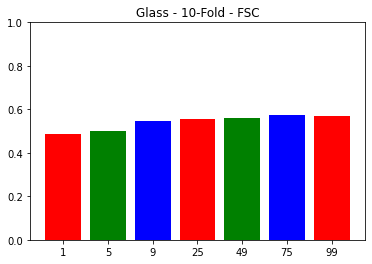

In [56]:
print("=== K-Fold ===")
cross_validator = KFold
accs = {}
precs = {}
recs = {}
fscrs = {}

for fold_num in fold_nums:
    folds = cross_validator(n_splits=fold_num)
    y_preds = rf_for_estimators_nb(data_X, data_y, folds, est_list)
    print('K =', fold_num)
    for ests in est_list:
        accs[ests] = utils.get_accuracy(data_y, y_preds[ests])
        precs[ests] = utils.get_precision(data_y, y_preds[ests])
        recs[ests] = utils.get_recall(data_y, y_preds[ests])
        fscrs[ests] = utils.get_FSC(data_y, y_preds[ests])
        
        if tex:
            # to .tex table
            print('  ', ests, '&', accs[ests], '&', precs[ests], \
                  '&', recs[ests], '&', fscrs[ests], '\\\\')
            #print('  ', ests, '&', fscrs[ests])
        else:
            print('\tNnum of estimators =', ests, 'FSC =', fscrs[ests])
        
    utils.bar_plot('{} - {}-Fold - Accuracy'.format(ds_name, fold_num), accs, out_path=out_path, to_file='estims', show=show_plots)
    utils.bar_plot('{} - {}-Fold - Precision'.format(ds_name, fold_num), precs, out_path=out_path, to_file='estims', show=show_plots)
    utils.bar_plot('{} - {}-Fold - Recall'.format(ds_name, fold_num), recs, out_path=out_path, to_file='estims', show=show_plots)
    utils.bar_plot('{} - {}-Fold - FSC'.format(ds_name, fold_num), fscrs, out_path=out_path, to_file='estims', show=show_plots, save=True)

=== Stratified K-Fold ===
K = 2
   1 & 0.852 & 0.854 & 0.852 & 0.853 \\
   5 & 0.876 & 0.889 & 0.876 & 0.879 \\
   9 & 0.876 & 0.885 & 0.876 & 0.878 \\
   25 & 0.91 & 0.911 & 0.91 & 0.91 \\
   49 & 0.89 & 0.899 & 0.89 & 0.892 \\
   75 & 0.905 & 0.91 & 0.905 & 0.906 \\
   99 & 0.89 & 0.9 & 0.89 & 0.892 \\
K = 5
   1 & 0.89 & 0.89 & 0.89 & 0.89 \\
   5 & 0.876 & 0.877 & 0.876 & 0.875 \\
   9 & 0.886 & 0.889 & 0.886 & 0.887 \\
   25 & 0.886 & 0.888 & 0.886 & 0.886 \\
   49 & 0.886 & 0.888 & 0.886 & 0.887 \\
   75 & 0.89 & 0.893 & 0.89 & 0.891 \\
   99 & 0.89 & 0.893 & 0.89 & 0.891 \\
K = 10
   1 & 0.829 & 0.831 & 0.829 & 0.83 \\
   5 & 0.9 & 0.9 & 0.9 & 0.9 \\
   9 & 0.881 & 0.881 & 0.881 & 0.881 \\
   25 & 0.9 & 0.9 & 0.9 & 0.9 \\
   49 & 0.914 & 0.915 & 0.914 & 0.914 \\
   75 & 0.905 & 0.905 & 0.905 & 0.905 \\
   99 & 0.91 & 0.91 & 0.91 & 0.909 \\


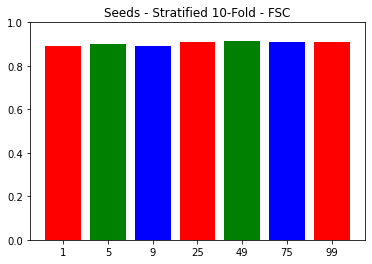

In [81]:
print("=== Stratified K-Fold ===")
cross_validator = StratifiedKFold
accs = {}
precs = {}
recs = {}
fscrs = {}

for fold_num in fold_nums:
    folds = cross_validator(n_splits=fold_num)
    y_preds = rf_for_estimators_nb(data_X, data_y, folds, est_list)
    print('K =', fold_num)
    for ests in est_list:
        accs[ests] = utils.get_accuracy(data_y, y_preds[ests])
        precs[ests] = utils.get_precision(data_y, y_preds[ests])
        recs[ests] = utils.get_recall(data_y, y_preds[ests])
        fscrs[ests] = utils.get_FSC(data_y, y_preds[ests])
        
        if tex:
            # to .tex table
            print('  ', ests, '&', accs[ests], '&', precs[ests], \
                  '&', recs[ests], '&', fscrs[ests], '\\\\')
            #print('  ', ests, '&', fscrs[ests])
        else:
            print('\tNnum of estimators =', ests, 'FSC =', fscrs[ests])

    utils.bar_plot('{} - Stratified {}-Fold - Accuracy'.format(ds_name, fold_num), accs, out_path=out_path, to_file='estims', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - Precision'.format(ds_name, fold_num), precs, out_path=out_path, to_file='estims', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - Recall'.format(ds_name, fold_num), recs, out_path=out_path, to_file='estims', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - FSC'.format(ds_name, fold_num), fscrs, out_path=out_path, to_file='estims', show=show_plots, save=True)

### FSC whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

In [82]:
fold_nums = [2, 5, 10]
bootstrap = [True, False]
show_plots = False
#tex = False # if False - readable info

=== K-Fold ===
K = 2
   True & 0.234 & 0.06 & 0.11 & 0.078 \\
   False & 0.229 & 0.063 & 0.107 & 0.079 \\
K = 5
   True & 0.346 & 0.198 & 0.22 & 0.203 \\
   False & 0.332 & 0.176 & 0.234 & 0.194 \\
K = 10
   True & 0.565 & 0.412 & 0.396 & 0.398 \\
   False & 0.551 & 0.427 & 0.421 & 0.423 \\


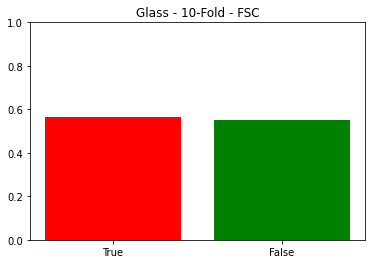

In [59]:
print("=== K-Fold ===")
cross_validator = KFold
accs = {}
precs = {}
recs = {}
fscrs = {}

for fold_num in fold_nums:
    folds = cross_validator(n_splits=fold_num)
    print('K =', fold_num)
    for bs in bootstrap:
        classifier = RandomForestClassifier(bootstrap=bs)
        y_pred = rf_for_params(data_X, data_y, classifier, folds)
        
        accs[bs] = utils.get_accuracy(data_y, y_pred)
        precs[bs] = utils.get_precision(data_y, y_pred)
        recs[bs] = utils.get_recall(data_y, y_pred)
        fscrs[bs] = utils.get_FSC(data_y, y_pred)
        
        if tex:
            # to .tex table
            print('  ', bs, '&', accs[bs], '&', precs[bs], \
                  '&', recs[bs], '&', fscrs[bs], '\\\\')
            #print('  ', bs, '&', fscrs[bs], '\\\\')
        else:
            print('\tBootstrap =', bs, 'FSC =', fscrs[bs])

    utils.bar_plot('{} - {}-Fold - Accuracy'.format(ds_name, fold_num), accs, out_path=out_path, to_file='bootstrap', show=show_plots)
    utils.bar_plot('{} - {}-Fold - Precision'.format(ds_name, fold_num), precs, out_path=out_path, to_file='bootstrap', show=show_plots)
    utils.bar_plot('{} - {}-Fold - Recall'.format(ds_name, fold_num), recs, out_path=out_path, to_file='bootstrap', show=show_plots)
    utils.bar_plot('{} - {}-Fold - FSC'.format(ds_name, fold_num), fscrs, out_path=out_path, to_file='bootstrap', show=show_plots, save=True)

=== Stratified K-Fold ===
K = 2
   True & 0.89 & 0.897 & 0.89 & 0.892 \\
   False & 0.89 & 0.897 & 0.89 & 0.892 \\
K = 5
   True & 0.886 & 0.888 & 0.886 & 0.886 \\
   False & 0.9 & 0.902 & 0.9 & 0.9 \\
K = 10
   True & 0.91 & 0.91 & 0.91 & 0.91 \\
   False & 0.914 & 0.914 & 0.914 & 0.914 \\


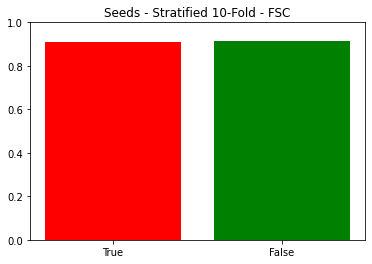

In [83]:
print("=== Stratified K-Fold ===")
cross_validator = StratifiedKFold
accs = {}
precs = {}
recs = {}
fscrs = {}

for fold_num in fold_nums:
    folds = cross_validator(n_splits=fold_num)
    print('K =', fold_num)
    for bs in bootstrap:
        classifier = RandomForestClassifier(bootstrap=bs)
        y_pred = rf_for_params(data_X, data_y, classifier, folds)
        
        accs[bs] = utils.get_accuracy(data_y, y_pred)
        precs[bs] = utils.get_precision(data_y, y_pred)
        recs[bs] = utils.get_recall(data_y, y_pred)
        fscrs[bs] = utils.get_FSC(data_y, y_pred)
        
        if tex:
            # to .tex table
            print('  ', bs, '&', accs[bs], '&', precs[bs], \
                  '&', recs[bs], '&', fscrs[bs], '\\\\')
            #print('  ', bs, '&', fscrs[bs], '\\\\')
        else:
            print('\tBootstrap =', bs, 'FSC =', fscrs[bs])
        
    utils.bar_plot('{} - Stratified {}-Fold - Accuracy'.format(ds_name, fold_num), accs, out_path=out_path, to_file='bootstrap', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - Precision'.format(ds_name, fold_num), precs, out_path=out_path, to_file='bootstrap', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - Recall'.format(ds_name, fold_num), recs, out_path=out_path, to_file='bootstrap', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - FSC'.format(ds_name, fold_num), fscrs, out_path=out_path, to_file='bootstrap', show=show_plots, save=True)

### FSC for different function to measure the quality of a split

In [84]:
fold_nums = [2, 5, 10]
criterions = ['gini', 'entropy']
show_plots = False
#tex = False # if False - readable info

=== K-Fold ===
K = 2
   gini & 0.238 & 0.063 & 0.112 & 0.081 \\
   entropy & 0.229 & 0.062 & 0.107 & 0.079 \\
K = 5
   gini & 0.285 & 0.136 & 0.168 & 0.143 \\
   entropy & 0.322 & 0.158 & 0.187 & 0.167 \\
K = 10
   gini & 0.575 & 0.421 & 0.418 & 0.413 \\
   entropy & 0.565 & 0.414 & 0.406 & 0.404 \\


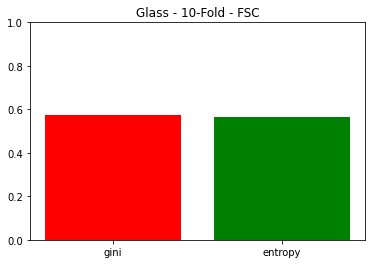

In [62]:
print("=== K-Fold ===")
cross_validator = KFold
accs = {}
precs = {}
recs = {}
fscrs = {}

for fold_num in fold_nums:
    folds = cross_validator(n_splits=fold_num)
    print('K =', fold_num)
    for criterion in criterions:
        classifier = RandomForestClassifier(criterion=criterion)
        y_pred = rf_for_params(data_X, data_y, classifier, folds)
        
        accs[criterion] = utils.get_accuracy(data_y, y_pred)
        precs[criterion] = utils.get_precision(data_y, y_pred)
        recs[criterion] = utils.get_recall(data_y, y_pred)
        fscrs[criterion] = utils.get_FSC(data_y, y_pred)
        
        if tex:
            # to .tex table
            print('  ', criterion, '&', accs[criterion], '&', precs[criterion], \
                  '&', recs[criterion], '&', fscrs[criterion], '\\\\')
            #print('  ', criterion, '&', fscrs[criterion], '\\\\')
        else:
            print('\tCriterion =', criterion, 'FSC =', fscrs[criterion])
        
    utils.bar_plot('{} - {}-Fold - Accuracy'.format(ds_name, fold_num), accs, out_path=out_path, to_file='criterion', show=show_plots)
    utils.bar_plot('{} - {}-Fold - Precision'.format(ds_name, fold_num), precs, out_path=out_path, to_file='criterion', show=show_plots)
    utils.bar_plot('{} - {}-Fold - Recall'.format(ds_name, fold_num), recs, out_path=out_path, to_file='criterion', show=show_plots)
    utils.bar_plot('{} - {}-Fold - FSC'.format(ds_name, fold_num), fscrs, out_path=out_path, to_file='criterion', show=show_plots, save=True)

=== Stratified K-Fold ===
K = 2
   gini & 0.881 & 0.89 & 0.881 & 0.883 \\
   entropy & 0.871 & 0.879 & 0.871 & 0.873 \\
K = 5
   gini & 0.89 & 0.893 & 0.89 & 0.891 \\
   entropy & 0.89 & 0.893 & 0.89 & 0.891 \\
K = 10
   gini & 0.905 & 0.905 & 0.905 & 0.905 \\
   entropy & 0.905 & 0.905 & 0.905 & 0.905 \\


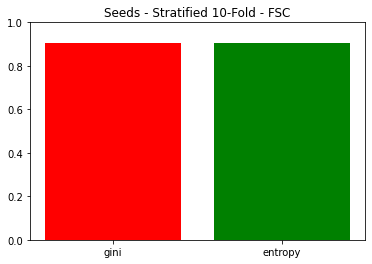

In [85]:
print("=== Stratified K-Fold ===")
cross_validator = StratifiedKFold
accs = {}
precs = {}
recs = {}
fscrs = {}

for fold_num in fold_nums:
    folds = cross_validator(n_splits=fold_num)
    print('K =', fold_num)
    for criterion in criterions:
        classifier = RandomForestClassifier(criterion=criterion)
        y_pred = rf_for_params(data_X, data_y, classifier, folds)
        
        accs[criterion] = utils.get_accuracy(data_y, y_pred)
        precs[criterion] = utils.get_precision(data_y, y_pred)
        recs[criterion] = utils.get_recall(data_y, y_pred)
        fscrs[criterion] = utils.get_FSC(data_y, y_pred)
        
        if tex:
            # to .tex table
            print('  ', criterion, '&', accs[criterion], '&', precs[criterion], \
                  '&', recs[criterion], '&', fscrs[criterion], '\\\\')
            #print('  ', criterion, '&', fscrs[criterion], '\\\\')
        else:
            print('\tCriterion =', criterion, 'FSC =', fscrs[criterion])
        
    utils.bar_plot('{} - Stratified {}-Fold - Accuracy'.format(ds_name, fold_num), accs, out_path=out_path, to_file='criterion', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - Precision'.format(ds_name, fold_num), precs, out_path=out_path, to_file='criterion', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - Recall'.format(ds_name, fold_num), recs, out_path=out_path, to_file='criterion', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - FSC'.format(ds_name, fold_num), fscrs, out_path=out_path, to_file='criterion', show=show_plots, save=True)

### FSC for the number of features to consider when looking for the best split

In [86]:
fold_nums = [2, 5, 10]
max_features_list = ['sqrt', 'log2', 'None', 1.0]
show_plots = False
#tex = False # if False - readable info

=== K-Fold ===
K = 2
   sqrt & 0.206 & 0.056 & 0.096 & 0.071 \\
   log2 & 0.215 & 0.056 & 0.101 & 0.072 \\
   None & 0.196 & 0.056 & 0.092 & 0.069 \\
   1.0 & 0.215 & 0.059 & 0.101 & 0.074 \\
K = 5
   sqrt & 0.322 & 0.186 & 0.187 & 0.175 \\
   log2 & 0.29 & 0.144 & 0.171 & 0.151 \\
   None & 0.299 & 0.148 & 0.186 & 0.158 \\
   1.0 & 0.266 & 0.124 & 0.149 & 0.131 \\
K = 10
   sqrt & 0.561 & 0.398 & 0.393 & 0.393 \\
   log2 & 0.565 & 0.427 & 0.407 & 0.412 \\
   None & 0.523 & 0.38 & 0.382 & 0.38 \\
   1.0 & 0.542 & 0.407 & 0.407 & 0.406 \\


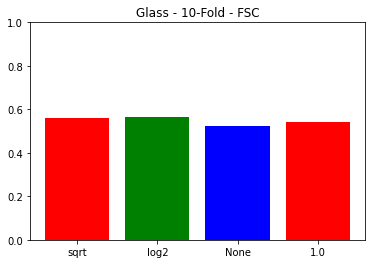

In [65]:
print("=== K-Fold ===")
cross_validator = KFold
accs = {}
precs = {}
recs = {}
fscrs = {}

for fold_num in fold_nums:
    folds = cross_validator(n_splits=fold_num)
    print('K =', fold_num)
    for max_features in max_features_list:
        classifier = RandomForestClassifier(max_features=(None if max_features=='None' else max_features))
        y_pred = rf_for_params(data_X, data_y, classifier, folds)
        
        accs[max_features] = utils.get_accuracy(data_y, y_pred)
        precs[max_features] = utils.get_precision(data_y, y_pred)
        recs[max_features] = utils.get_recall(data_y, y_pred)
        fscrs[max_features] = utils.get_FSC(data_y, y_pred)
        
        if tex:
            # to .tex table
            print('  ', max_features, '&', accs[max_features], '&', precs[max_features], \
                  '&', recs[max_features], '&', fscrs[max_features], '\\\\')
            #print('  ', max_features, '&', fscrs[max_features], '\\\\')
        else:
            print('\tMax features =', max_features, 'FSC =', fscrs[max_features])
        
    utils.bar_plot('{} - {}-Fold - Accuracy'.format(ds_name, fold_num), accs, out_path=out_path, to_file='max_features', show=show_plots)
    utils.bar_plot('{} - {}-Fold - Precision'.format(ds_name, fold_num), precs, out_path=out_path, to_file='max_features', show=show_plots)
    utils.bar_plot('{} - {}-Fold - Recall'.format(ds_name, fold_num), recs, out_path=out_path, to_file='max_features', show=show_plots)
    utils.bar_plot('{} - {}-Fold - FSC'.format(ds_name, fold_num), fscrs, out_path=out_path, to_file='max_features', show=show_plots, save=True)

=== Stratified K-Fold ===
K = 2
   sqrt & 0.876 & 0.884 & 0.876 & 0.878 \\
   log2 & 0.886 & 0.896 & 0.886 & 0.888 \\
   None & 0.895 & 0.903 & 0.895 & 0.897 \\
   1.0 & 0.89 & 0.897 & 0.89 & 0.892 \\
K = 5
   sqrt & 0.89 & 0.893 & 0.89 & 0.891 \\
   log2 & 0.881 & 0.882 & 0.881 & 0.881 \\
   None & 0.914 & 0.914 & 0.914 & 0.914 \\
   1.0 & 0.914 & 0.914 & 0.914 & 0.914 \\
K = 10
   sqrt & 0.91 & 0.91 & 0.91 & 0.91 \\
   log2 & 0.905 & 0.904 & 0.905 & 0.904 \\
   None & 0.924 & 0.924 & 0.924 & 0.924 \\
   1.0 & 0.924 & 0.924 & 0.924 & 0.924 \\


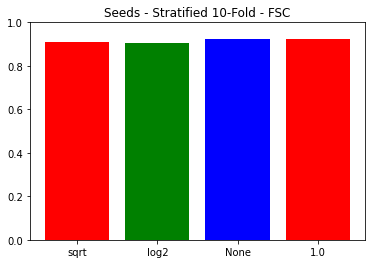

In [87]:
print("=== Stratified K-Fold ===")
cross_validator = StratifiedKFold
accs = {}
precs = {}
recs = {}
fscrs = {}

for fold_num in fold_nums:
    folds = cross_validator(n_splits=fold_num)
    print('K =', fold_num)
    for max_features in max_features_list:
        classifier = RandomForestClassifier(max_features=(None if max_features=='None' else max_features))
        y_pred = rf_for_params(data_X, data_y, classifier, folds)
        
        accs[max_features] = utils.get_accuracy(data_y, y_pred)
        precs[max_features] = utils.get_precision(data_y, y_pred)
        recs[max_features] = utils.get_recall(data_y, y_pred)
        fscrs[max_features] = utils.get_FSC(data_y, y_pred)
        
        if tex:
            # to .tex table
            print('  ', max_features, '&', accs[max_features], '&', precs[max_features], \
                  '&', recs[max_features], '&', fscrs[max_features], '\\\\')
            #print('  ', max_features, '&', fscrs[max_features], '\\\\')
        else:
            print('\tMax features =', max_features, 'FSC =', fscrs[max_features])
        
    utils.bar_plot('{} - Stratified {}-Fold - Accuracy'.format(ds_name, fold_num), accs, out_path=out_path, to_file='max_features', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - Precision'.format(ds_name, fold_num), precs, out_path=out_path, to_file='max_features', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - Recall'.format(ds_name, fold_num), recs, out_path=out_path, to_file='max_features', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - FSC'.format(ds_name, fold_num), fscrs, out_path=out_path, to_file='max_features', show=show_plots, save=True)

In [67]:
ds_name

'Glass'